# Data Wrangling

## Objetivos

- Manejar valores faltantes
- Corregir el formato de la información
- Estandarizar y normalizar la información

# Tabla de contenidos

- Identificar y manejar valores faltantes(missing values).
    - Identificar valores faltantes(missing values).
    - Manejo de valores faltantes(missing values).
    - Corregir el formato de la información.
- Estandarización de la información.
- Normalización de la información (centrar/escalado).
- Binning
- Variable Indicadora ( indicator variable)

### Cual es el propósito del Data Wrangling

Data wrangling es el proceso de convertir información del formato inicial a un formato que se ajuste mejor al análisis.

### ¿Cual es la tasa de consumo de combustible (L/100k) para el automóvil diesel?

### Importar la información

Puedes encontrar el"Automobile Dataset" en el siguiente link: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data. Estaremos usando esta dataset a lo largo del curso.

### Importamos pandas

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import warnings

warnings.simplefilter(action="ignore",category=FutureWarning)

C:\Users\reivi\AppData\Local\Temp\ipykernel_13796\2693074665.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Leyendo el dataset desde la URL y agregando los encabezados correspondientes.

Primero asignamos la URL del dataset a un "nombre de archivo".

In [2]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

Luego, creamos una lista en Python llamada headers.

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Necesitaras descargar el archivo si lo estas corriendo de manera local. descomenta la siguiente linea para descargarlo.

In [4]:
# import urllib.request

# urllib.request.urlretrieve(filename,"auto.csv")
# print("Descarga completa!")

Usa el método `read_csv()` de *pandas* para cargar la información desde la pagina web. Ajusta el parámetro "names" igual a la lista "headers" de Python.

In [5]:
df = pd.read_csv(filename, names=headers)

Usa el método .head() mostrar las primeras cinco filas del dataframe.

In [6]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Como podemos ver, varios signos de pregunta aparecen en el dataframe; Esos son valores faltantes (missing values), los cuales pueden obstaculizar nuestro análisis futuro.

asi que, Como identificamos todos esos valores faltantes y trabajamos con ellos.
**Como trabajar los valores faltantes.**

Pasos para trabajar con los valores faltantes:
> 1. Identificar los valores faltantes.
> 2. Trabajar los valores faltantes.
> 3. Corregir el formato de la información.

## Identificar y manejar los valores faltantes

### Identificar valores faltantes

**Convertir "?" a NaN**
En el dataset car, viene con un signo de pregunta "?". Reemplazamos "?" con NaN (Not a Number), marcador por defecto de Python para los valores faltantes. Aquí usamos la función:

    .replace(A,B inplace=True)
Para reemplazar A y B.

In [7]:
import numpy as np

# Reemplazamos "?" a NaN
df.replace("?",np.nan, inplace=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Evaluando la presencia de datos faltantes.

Los valores faltantes son convertidos por defecto. Usamos la siguiente función para identificar los valores faltantes. Hay dos métodos para detector valores faltantes:
> 1. **.isnull()**
> 2. **.notnull()**

La salida es un valor booleano indicando si el valor que le pasamos en el argumento es de hecho un valor faltante.

In [8]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" significa que el valor es un valor faltante mientras que "False" significa que el valor no es un valor faltante.

### Contando valores faltantes en cada columna.

Usando un ciclo `for` en Python, Podemos rápidamente saber el numero de valores faltantes en cada columna. Como mencionamos arriba, `"True"` representa un valor faltante y `"False"` significa que el valor esta presente en el dataset. En el cuerpo del loop el método `".value_counts()"` cuenta el numero de valores `"True"`

In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

Basado en el sumario de arriba, cada columna tiene 205 filas de información y siete columnas contienen valores faltantes.

> 1. "normalized-losses": 41 missing data
> 2. "num-of-doors": 2 missing data
> 3. "bore": 4 missing data
> 4. "stroke": 4 missing data
> 5. "horsepower": 2 missing data
> 6. "peak-rpm": 2 missing data
> 7. "price": 4 missing data

### Tratar con los valores faltantes

**Como trabajar con los valores faltantes**

1. Eliminar información
    - a. Eliminar la fila completa
    - b. Eliminar la columna completa

2. Reemplazar la información
    - a. Reemplazarlo por el valor promedio
    - b. Reemplazarlo por la frecuencia
    - c. Reemplazarlo en base a otras funciones



La columna completa debe ser eliminada solo si la mayoría de las entradas de la columna están vacías. En nuestro dataset ninguna de las columnas están lo suficientemente vacías. Tenemos algo de libertad en escoger cual método usar para reemplazar la información:

**Reemplazar por la media**
- "normalized-losses": 41 valores faltantes, los reemplazaremos con mean
- "stroke": 4 valores faltantes, los reemplazaremos con mean
- "horsepower" : 2 valores faltantes, los reemplazaremos con mean
- "peak-rpm": 2  valores faltantes, los reemplazaremos con mean

**Reemplazar por frecuencia**
- "num-of-doors": 2 valores faltantes, los reemplazaremos con "four"
 - Razón: 84% de los sedan son cuatro puertas. Dado que cuatro puertas es más frecuente, es mas probable que ocurra.

**Eliminar la fila completa**
- "price": 4 valores faltantes, simplemente elimina la fila completa
 - Razón: precio es lo que queremos predecir. Cualquier entrada de información sin el precio no puede ser ocupada para la predicción; es por eso que cualquier fila sin la información del precio no es util para nosotros.

### Calcula el valor promedio para la columna "normalized-losses"

In [10]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("El promedio de normalized-losses es:", avg_norm_loss)

El promedio de normalized-losses es: 122.0


### Reemplaza los valores NaN por el valor promedio para la columna "normalized-losses"

In [11]:
df["normalized-losses"].replace(np.nan,avg_norm_loss, inplace=True)

### Calcula el valor promedio para la columna "bore"

In [12]:
avg_bore = df["bore"].astype("float").mean(axis=0)
print("El promedio de bore es:", avg_bore)

El promedio de bore es: 3.3297512437810943


### Reemplaza NaN por el valor promedio de la columna "bore"

In [13]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

## Pregunta #1:

**Basado en el ejemplo de arriba, reemplaza NaN en la columna `"stroke"` por el valor promedio**

In [14]:
# Escribe tu código abajo
# Calculamos primero el valor promedio de la columna stroke
avg_stroke = df["stroke"].astype("float").mean(axis=0)
print("El valor promedio de stroke es:", avg_stroke)

# Reemplazamos los valores NaN por el valor promedio de la columna
df["stroke"].replace(np.nan, avg_stroke,inplace=True)

El valor promedio de stroke es: 3.255422885572139


### Calcula el valor promedio para la columna "peak-rpm"

In [15]:
avg_peak_rpm = df["peak-rpm"].astype("float").mean(axis=0)
print("El valor promedio  de la columna peak-rpm es:", avg_peak_rpm)

El valor promedio  de la columna peak-rpm es: 5125.369458128079


### Reemplaza los valores NaN por el valor promedio de la columna "peak-rpm"

In [16]:
df["peak-rpm"].replace(np.nan,avg_peak_rpm,inplace=True)

Para ver que valores están presentes en una columna en particular, podemos usar el método value_counts():

In [17]:
df["num-of-doors"].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

Podemos ver que cuatro puertas son las mas comunes. También podemos usar el método `.idxmax()` para calcular el tipo mas común automáticamente 

In [18]:
df["num-of-doors"].value_counts().idxmax()

'four'

El procedimiento de reemplazo es similar a lo que hemos visto previamente.

In [19]:
df["num-of-doors"].replace(np.nan,"four",inplace=True)

Finalmente. Vamos a eliminar todas las filas que no poseen precios.

In [20]:
# Simplemente elimina todas las filas que contengan el valor NaN en la columna "price"

df.dropna(subset=["price"],axis=0, inplace=True)

# restablece el indice, por que eliminamos dos filas.
df.reset_index(drop=True,inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Bien** ahora tenemos un dataset sin valores faltantes.

## Corregir el formato de la información

**Ya casi estamos ahí!**
El ultimo paso en la limpieza de datos es revisar y estar seguro que toda la información esta en el formato correcto(int,float,text u otra).

En *Pandas*, usamos:
**.dtype()** para verificar el tipo de información.
**.astype()** para cambiar el tipo de información.

### Vamos a listar el tipo de información por cada columna.

In [21]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Como podemos ver arriba, algunas columnas no tienen el tipo correcto. Variables de tipo numérica deberían tener el tipo `"float"` o `"int"`, y las variables con strings como categoría deben tener el tipo `"object"`. Por ejemplo las variables "bore" y "stroke" son valores numéricos que describen el motor, asi que esperamos que sean de tipo `"float"` o `"int"`; Aunque, es mostrado como tipo `"object"`. Tenemos que convertir el tipo de información en el formato apropiado para cada columna usando el método `"astype()"`.

### Convertir los tipos de información al formato apropiado.

In [22]:
df[["bore","stroke"]] = df[["bore","stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

### Vamos a listar las columnas luego de la conversion

In [23]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

**Maravilloso!**

Ahora finalmente tenemos un dataset limpio sin valores faltantes y con todos los tipos de información con el formato correcto.

## Estandarización de la información

La información recolectada de diferentes agencias se encuentra en diferentes formatos ( Data standardization es un termino para un tipo en particular de información donde sustraemos la media y lo dividimos por la desviación estándar.)

### Que es estandarización

Estandarización es el proceso de transformar información a un formato común, permitiendo al investigador hacer una comparación significativa.

### Ejemplo

Transforma mpg a L/100km:

En nuestro dataset, la columna consumo de combustible "city-mpg" y "highway-mpg" son representados por la unidad mpg(miles per gallon). Asume que desarrollamos una aplicación en un país que acepta como estándar el consumo de combustible como L/100km

Necesitamos aplicar la **transformación de información** para transformar mpg en L/100km.

La formula para la conversion de unidad es:

L/100KM = 235/mpg

Podemos hacer varias operaciones matemáticas en *Pandas*.

In [24]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [25]:
# Convertimos mpg a L/100km con una operación matemática (235 dividido por mpg)

df["city-L/100km"] = 235/df["city-mpg"]

# Revisamos la información transformada.
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


## Pregunta #2:

**De acuerdo al ejemplo de arriba, transforma mpg a L/100km de "highway-mpg" y cambia el nombre de la columna a "highway-L/100km".**

In [26]:
# Transforma mpg a L/100km por operación matemática(235 dividido por mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# Renombra la columna de "high-mpg" a "high-L/100km"
df.rename(columns={"highway-mpg":"highway-L/100km"}, inplace=True)

# Revisar la información transformada.
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


## Normalización de la información

### ¿Por que normalizar?

Normalizar es el proceso de transformar valores de varias variables a un rango similar. La típica normalización incluye  escalar la variable para que la variable promedio sea 0, escalar la variable para que la varianza sea 1, o escalar la variable para el valor de la varia valla del rango 0 a 1

**Ejemplo**

Para demostrar una normalización, diremos que queremos escalar la columna "length", "width", y "height"

**Objetivo**: Normalizar esas variables para que el rango de valor valla de 0 a 1

**Acercamiento**: Reemplazar el valor origina por (original value)/(maximum value)

In [27]:
# Reemplaza (Original value) by (original value)/(maximum value)

df["length"] = df["length"]/df["length"].max()
df["width"] = df["width"]/df["width"].max()

## Pregunta #3:

**De acuerdo al ejemplo de arriba, normaliza la columna "height"**.

In [28]:
df["height"] = df["height"]/df["height"].max()

df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Aquí podemos ver que hemos normalizado "length" "width", "height" en el rango de [0,1].

## Binning

¿Por que hacer binning?
Binning es el proceso de transformar variables numéricas continuas en una categoría discreta "bins" para un análisis agrupado

**Ejemplo**

En nuestro dataset, "horsepower" es un valor real que esta dentro del rango de 48 a 288 y tiene 59 valores únicos. Que pasa si solo nos preocupamos por el precio de los autos que tienen un nivel alto de caballos de fuerza, un nivel medio y un bajo nivel de caballos de fuerza (3 tipos), podemos reordenarlos dentro de tres "bins" para simplificar el análisis?.

Usaremos el método `cut` de pandas para segmentar la columna "horsepower" en tres bins.

### Ejemplo de Binning en pandas

Convertir la información al formato correcto:

In [29]:
df["horsepower"].fillna(0, inplace=True)

df["horsepower"] = df["horsepower"].astype(int,copy=True)

Vamos a gráficar el histograma de horsepower para ver como luce la distribución de horsepower.

Text(0.5, 1.0, 'horsepower bins')

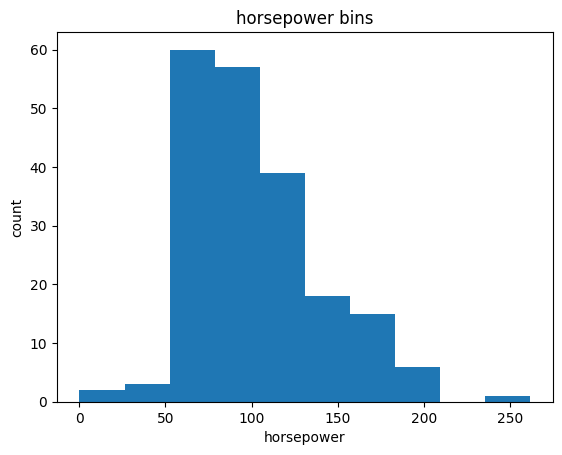

In [30]:
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df["horsepower"])

# Alista los marcadores x/y y el titulo del gráfico
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Nos gustaría 3 contenedores de igual tamaño y ancho asi que usamos `numpy` `linspace(start_value, end_value, numbers_generated)` function.

Dado que queremos incluir el valor mínimo de horsepower, queremos preparar `start_value = min(dif["horsepower"])`

Dado que queremos incluir el valor máximo de horsepower, queremos preparar `end_value = max(df["horsepower"])`

Dado que estamos construyendo 3 contenedores de igual largo, debe haber cuatro divisores, asi que `numbers_generates = 4`.

Creamos un arreglo con un valor mínimo y máximo al usar el ancho de banda calculado arriba. El valor determinara cuando un contenedor termina y otro comienza

In [31]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([  0.        ,  87.33333333, 174.66666667, 262.        ])

Alistamos los nombres de los grupos.

In [32]:
group_names=["Low","Medium","High"]

Usamos la función `"cut"` para determinar a donde pertenece cada valor de `df["horsepower"]`.

In [33]:
df["horsepower-binned"] = pd.cut(df["horsepower"], bins,labels=group_names, include_lowest=True)
df[["horsepower","horsepower-binned"]].head(20)

,horsepower,horsepower-binned
0,111,Medium
1,111,Medium
2,154,Medium
3,102,Medium
4,115,Medium
5,110,Medium
6,110,Medium
7,110,Medium
8,140,Medium
9,101,Medium


Veamos el numero de vehículos en cada contenedor

In [34]:
df["horsepower-binned"].value_counts()

horsepower-binned
Medium    106
Low        82
High       13
Name: count, dtype: int64

Vamos a gráficar la distribución de cada contenedor.

Text(0.5, 1.0, 'horsepower bins')

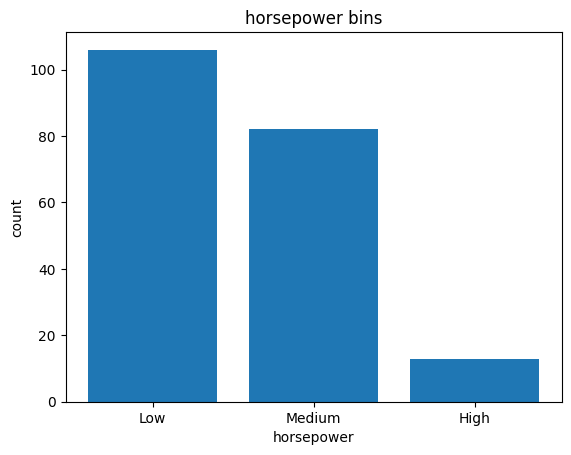

In [35]:
pyplot.bar(group_names,df["horsepower-binned"].value_counts())

# Alistamos los rótulos del eje x/y y el titulo
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Mira cuidadosamente el dataframe de arriba. Encontraras que la ultima columna provee los contenedores para "horsepower" basado en tres categorías("Low","Medium","High").

Exitosamente redujimos los intervalos de 59 a 3!

### Visualización de Contenedores

Normalmente, un histograma es usado para visualizar la distribución de los contenedores que creamos arriba.

Text(0.5, 1.0, 'horsepower bins')

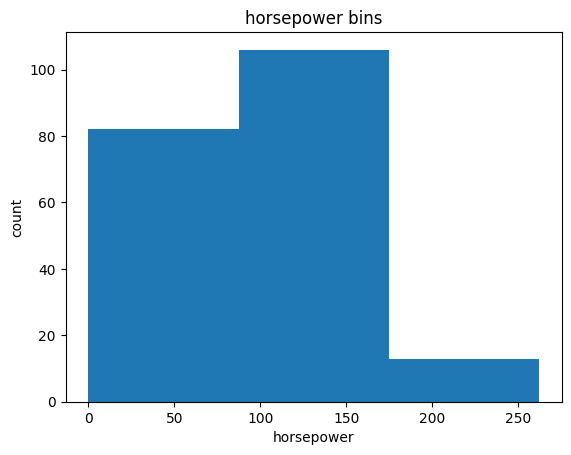

In [36]:
# Dibuja un histograma de los atributos de "horsepower" con 3 contenedores.
plt.pyplot.hist(df["horsepower"],bins=3)

# Ajusta el titulo y los rótulos del eje x/y

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

El gráfico de arriba muestra el resultado de los contenedores para los atributos de "horsepower".

## Indicador de variable (o Dummy Variable)

### ¿Que es un indicador de variable?
Un indicador de variable (o Dummy variable) es una variable numérica usada para rotular categorías. Ellas son llamadas `dummies` por que por si mismas ningún significado.

### Por que usar el indicador de variable
Usamos indicadores de variables para poder usar [variables categóricas](https://economipedia.com/definiciones/variable-categorica.html) para hacer un análisis de regresión en los módulos de más adelante.

**Ejemplo**

Vemos la columna "fuel_type" tiene solo dos valores únicos: "gas" o "diesel". La regresión no entiende palabras, solo números. Para usar este atributo en el análisis de regresión, convertimos "fuel-type" a un indicador de variables.

Usaremos el método de *pandas* "get_dummies" para asignar valores numéricos para las diferentes categorías de combustible.

In [37]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

obtenemos el indicador de variables y lo asignamos al dataframe "dummy_variable_1"

In [38]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()


,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


Cambia el nombre de las columnas para mayor claridad:

In [39]:
dummy_variable_1.rename(columns={"gas":"fuel-type-gas","diesel":"fuel-type-diesel"}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


En el dataframe, la columna "fuel-type" tiene valores para "gas" y "diesel" como 0 y 1 ahora.

In [40]:
# Combina el dataframe "df" y "dummy_variable_1"
df = pd.concat([df,dummy_variable_1],axis=1)

# Elimina la columna "fuel-type" de df
df.drop("fuel-type",axis=1, inplace=True)

In [41]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Medium,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Medium,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Medium,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Medium,False,True


Las ultimas dos columnas ahora son indicadores de variables representantes de la variable fuel-type ahora son 0 y 1

## Pregunta #4:

**Similar a lo realizado anteriormente, crea un indicador de variable para la columna "aspiration"**

In [44]:
# Obtenemos el indicador de variable de aspiration y lo asignamos al dataframe "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.head()

# Cambiamos el nombre de las columnas para mayor claridad
dummy_variable_2.rename(columns={"std":"aspiration-std", "turbo":"aspiration-turbo"}, inplace=True)

# Muestra las primeras cinco instancias de la variable "dummy_variable_2"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


## Pregunta #5:

**Combina el nuevo dataframe con el dataframe original, y luego elimina la columna `"aspiration"`**

In [45]:
# Combina el dataframe dummy con df
df = pd.concat([df,dummy_variable_2],axis=1)

# Eliminamos la columna aspiration
df.drop("aspiration",axis=1,inplace=True)

In [46]:
df.to_csv("clean_df.csv")

## Gracia por completar este lab!